In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


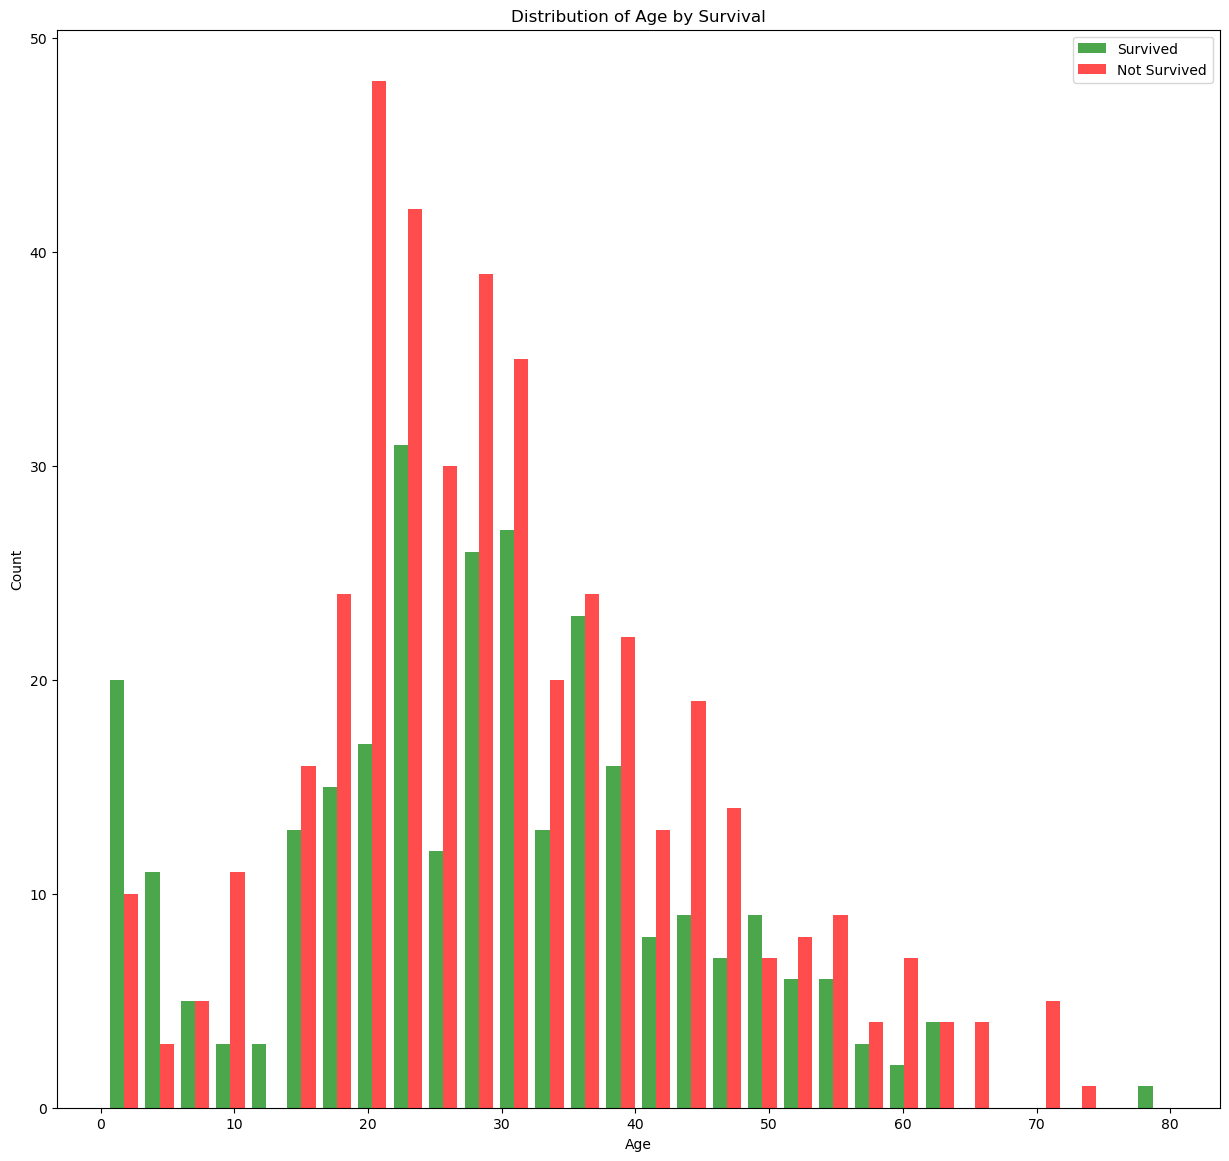

In [62]:
plt.figure(figsize=(15, 14))
plt.hist([train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']], bins=30, label=['Survived', 'Not Survived'], color=['green', 'red'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Survival')
plt.legend()
plt.show()


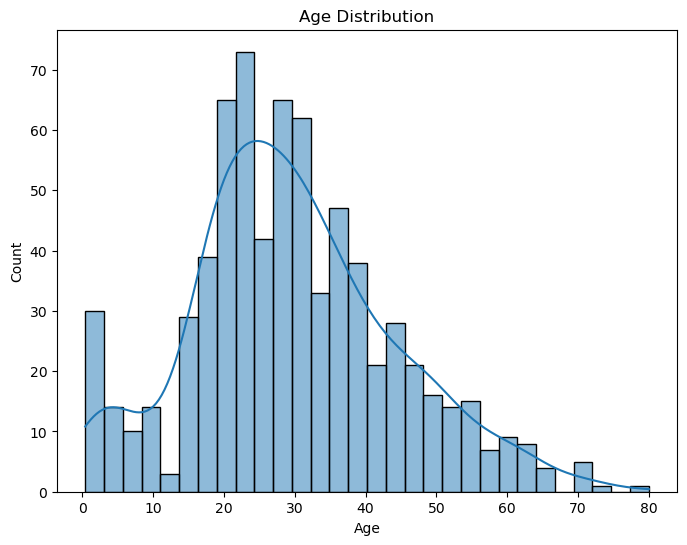

In [63]:
# Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(train['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

In [65]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


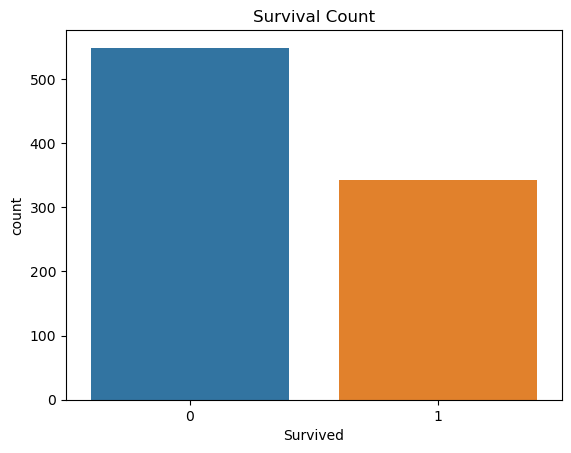

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [66]:
# Bar plot for survival count
sns.countplot(x=train['Survived'], data=train)
plt.title('Survival Count')
plt.show()

print(train['Survived'].value_counts(normalize=True) * 100)


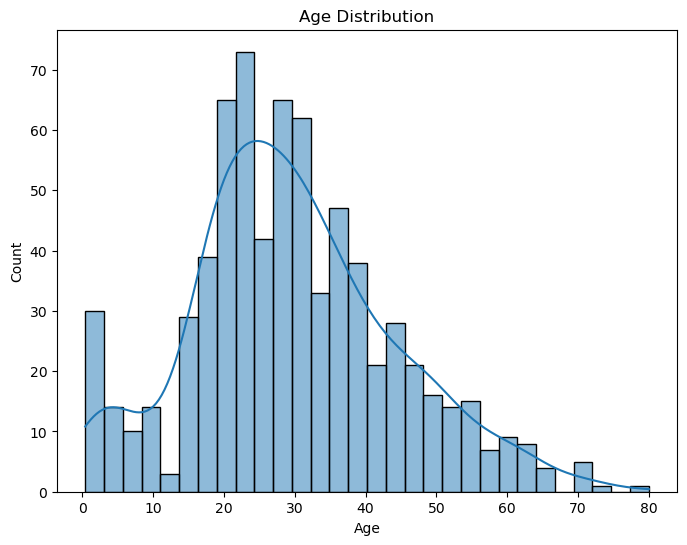

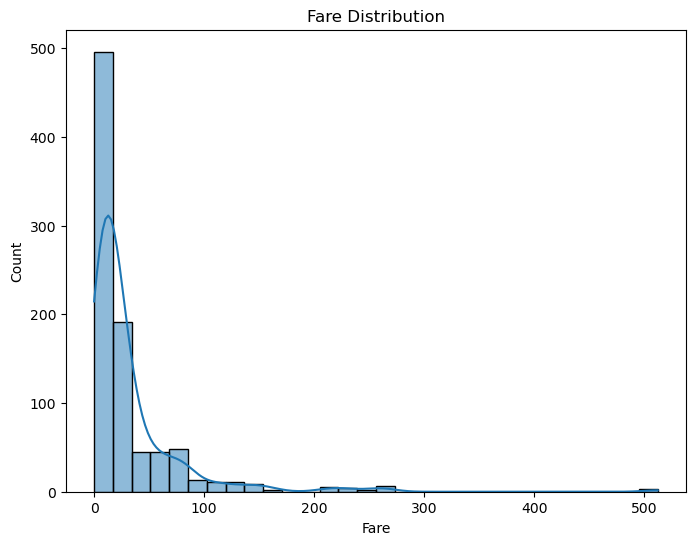

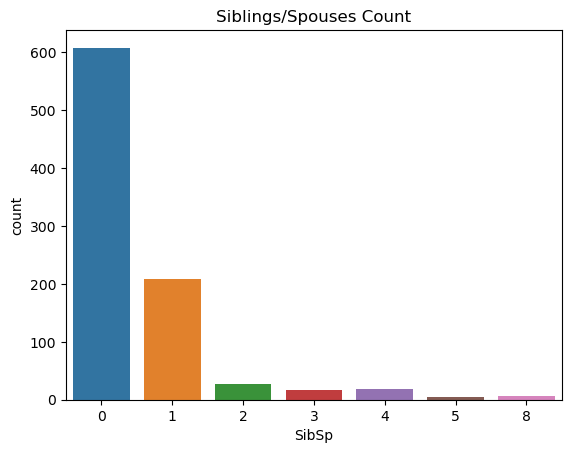

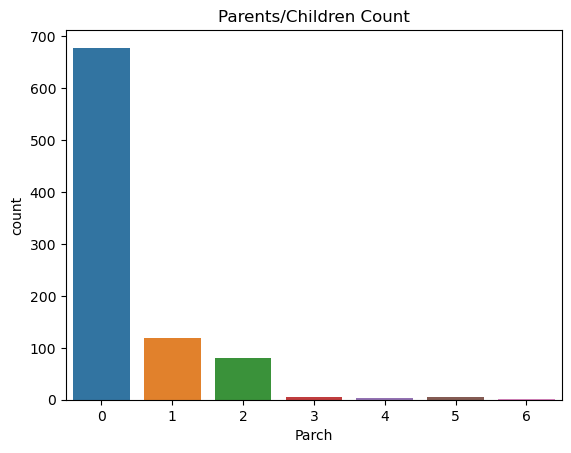

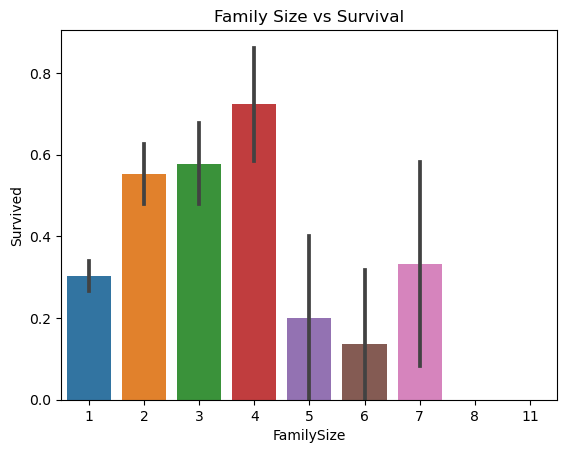

In [67]:
# Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(train['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Fare Distribution
plt.figure(figsize=(8,6))
sns.histplot(train['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

# SibSp (Siblings/Spouses) and Parch (Parents/Children) - Family Size
sns.countplot(x='SibSp', data=train)
plt.title('Siblings/Spouses Count')
plt.show()

sns.countplot(x='Parch', data=train)
plt.title('Parents/Children Count')
plt.show()

# Relationship between Survival and Family Size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title('Family Size vs Survival')
plt.show()


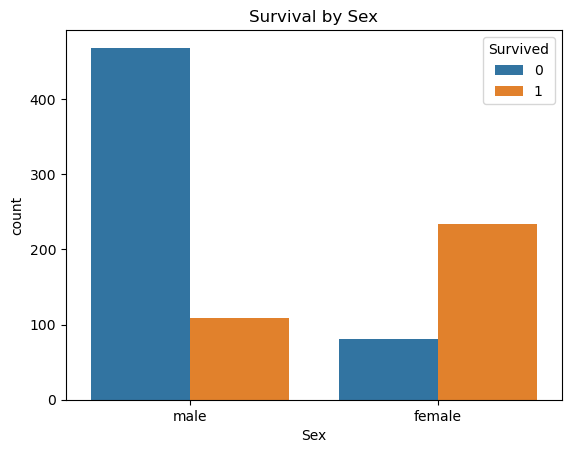

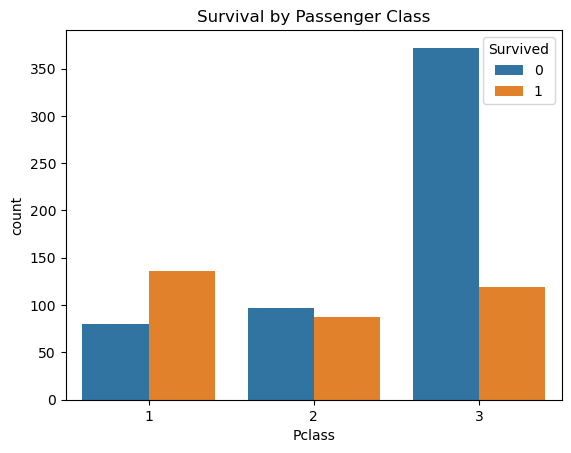

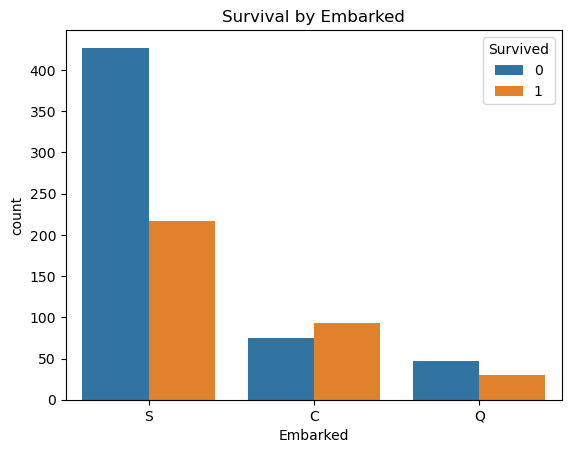

In [68]:
# Countplot for 'Sex' and survival
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Sex')
plt.show()

# Countplot for 'Pclass' and survival
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

# Countplot for 'Embarked' and survival
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival by Embarked')
plt.show()


In [69]:
import numpy as np


train['Age'].fillna(train['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train['Cabin'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

# Feature Engineering

# Group Age into bins
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Create Family Size (SibSp + Parch + 1 (self))
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create IsAlone feature (1 if no family members, 0 if with family)
train['IsAlone'] = np.where(train['FamilySize'] == 1, 1, 0)

# Extract titles from names
train['Title'] = train['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify titles by grouping them into broader categories
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

# Preview the changes
train[['Age', 'Cabin', 'Embarked', 'AgeGroup', 'FamilySize', 'IsAlone', 'Title']].head()




,Age,Cabin,Embarked,AgeGroup,FamilySize,IsAlone,Title
0,22.0,Unknown,S,Young Adult,2,0,Mr
1,38.0,C,C,Adult,2,0,Mrs
2,26.0,Unknown,S,Young Adult,1,1,Miss
3,35.0,C,S,Young Adult,2,0,Mrs
4,35.0,Unknown,S,Young Adult,1,1,Mr


In [70]:
# 3. Drop unnecessary columns for modeling
train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [73]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
FamilySize    0
AgeGroup      0
IsAlone       0
Title         0
dtype: int64

In [71]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,AgeGroup,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,Unknown,S,2,Young Adult,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,2,Adult,0,Mrs
2,1,3,female,26.0,0,0,7.9250,Unknown,S,1,Young Adult,1,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,2,Young Adult,0,Mrs
4,0,3,male,35.0,0,0,8.0500,Unknown,S,1,Young Adult,1,Mr


In [ ]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Cabin', 'AgeGroup', 'Title'], drop_first=True)


In [78]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,...,Cabin_Unknown,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0,3,22.0,1,0,7.25,2,0,True,False,...,True,False,True,False,False,False,True,False,False,False


In [80]:
X = train.drop('Survived', axis=1)
y = train['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Fare                    0.207241
Age                     0.171417
Title_Mr                0.139078
Sex_male                0.106799
Pclass                  0.064932
FamilySize              0.047540
Title_Mrs               0.039789
SibSp                   0.032136
Cabin_Unknown           0.026006
Title_Miss              0.023548
Embarked_S              0.021683
Parch                   0.021388
AgeGroup_Young Adult    0.013497
AgeGroup_Adult          0.011424
Cabin_E                 0.010368
IsAlone                 0.010244
Cabin_B                 0.009246
Embarked_Q              0.008565
Title_Rare              0.007168
Cabin_C                 0.007079
AgeGroup_Teen           0.006983
Cabin_D                 0.006266
AgeGroup_Senior         0.003918
Cabin_G                 0.001752
Cabin_F                 0.001561
Cabin_T                 0.000254
Title_the Countess      0.000117
dtype: float64

In [81]:
# Dropping less important features
columns_to_drop = ['Cabin_G', 'Cabin_F', 'Title_Rare', 'AgeGroup_Senior', 'Cabin_D', 'AgeGroup_Teen']
train.drop(columns=columns_to_drop, inplace=True)


In [83]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy = np.dot(accuracy ,  100)
print(f'Accuracy: {accuracy:.0f} %')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 82 %
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



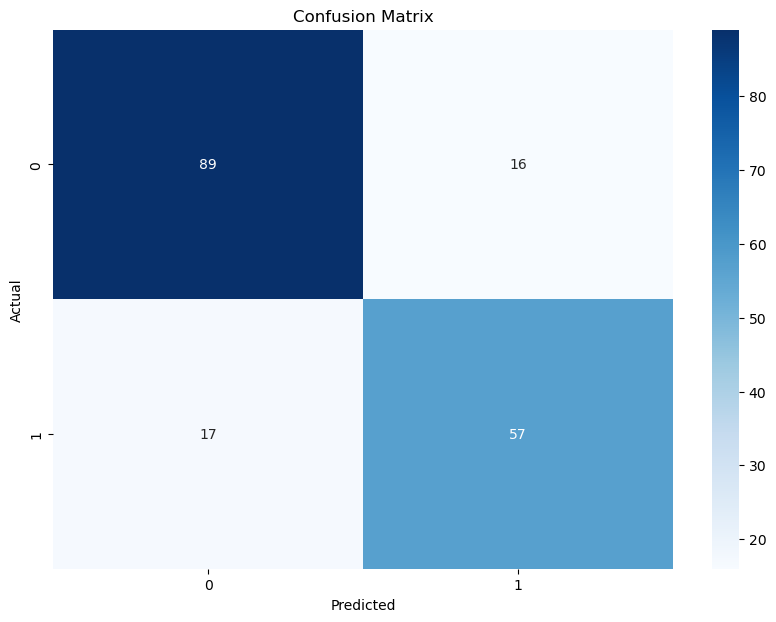

In [87]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()